[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mosleh-exeter/BEM1025/blob/main/Lecture/06-Lecture06-Plotting.ipynb)

# Session 06 - Data Visualization


### Data visualization is as much a part of the data processing step as the data presentation step. It is much easier to compare values when they are plotted than numeric values. By visualizing data we are able to get a better intuitive sense of the data than would be possible by looking at tables of values alone. Additionally, visualizations can bring to light hidden patterns in data, that you, the analyst, can exploit for model selection.

## This session will cover:
1. Different types of plots (distribution plot, bar plot, scatter plot, density plot,..)
2. Pair plots (put different plots in a single figure)
3. Plot different variables together (multi-variable plotting using 'facet')

<img src="https://github.com/mosleh-exeter/BEM1025/raw/main/images/thousand_words.jpg"  width="300" height="300">

## Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

https://seaborn.pydata.org/


But the following libraries are also widely used for visualization in Python

https://plotly.com/python/

https://realpython.com/ggplot-python/

## Loading libraries, we load a new libarary for visualization called seaborn

In [43]:
import pandas as pd

In [44]:
import seaborn as sns

## Loading dataset

In [45]:
# tips is a dataset included in the seaborn library
tips = sns.load_dataset("tips")

In [46]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Univariate/bivariate plotting

We can look at the data simple statisics using "describe function"

In [47]:
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

### Histograms

seaborn.histplot(data=None, x=None, hue=None, element='bars')

    data= Input data structure. Either a long-form collection of vectors that can be assigned to named variables or a wide-form dataset that will be internally reshaped.
    
    x=Variables that specify positions on the x 
    
    hue=Semantic variable that is mapped to determine the color of plot elements.
    
    element=Semantic variable that is mapped to determine the color of plot elements

seaborn plots univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

Read more: https://seaborn.pydata.org/generated/seaborn.histplot.html

**Note:** You can put a semicolon to remove the output text of the seaborn functions

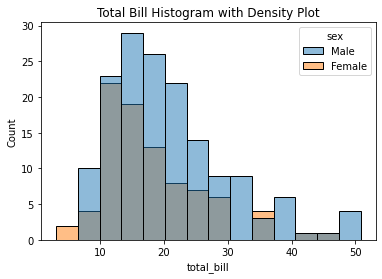

In [51]:
sns.histplot(tips,x='total_bill',hue='sex').set_title("Total Bill Histogram with Density Plot");

The histogram reveals that 20 dollars is the usual total_bill (mean 19.78)

### Count Plots

seaborn.countplot(data=None, x=None, hue=None)

Countplot Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

Read more: https://seaborn.pydata.org/generated/seaborn.countplot.html

Here we create ax a plot object and then use it to set the title, axis labels

Text(0, 0.5, 'Frequency')

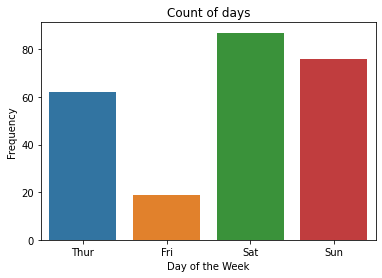

In [52]:
ax = sns.countplot(data=tips,x='day')
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')


We observe from the previous figure that people tend to dine outside mostly on weekends

### Scatter (reg plot) Plot

seaborn.regplot(data=None, x=None, y=None)
plots data and a linear regression model fit.

Read more: https://seaborn.pydata.org/generated/seaborn.regplot.html

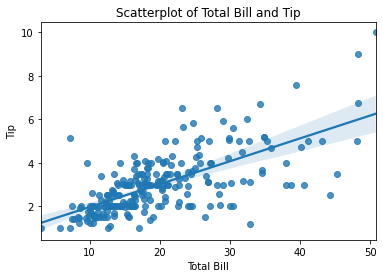

In [53]:
ax = sns.regplot(data=tips, x='total_bill', y='tip')
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip');

We observe some relationship between the total amount paid and the tip received, but the variabality increases for higher values of bills

## Density Plot

seaborn.kdeplot(data=None, *, x=None, y=None, hue=None)

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

Read more: https://seaborn.pydata.org/generated/seaborn.kdeplot.html

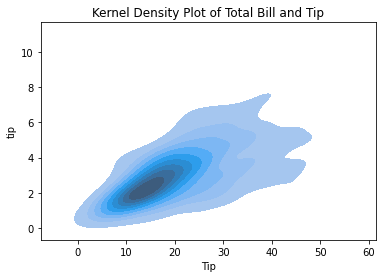

In [55]:
ax = sns.kdeplot(data=tips,x='total_bill',y='tip',shade=True) # shade will fill in the contours

ax.set_title('Kernel Density Plot of Total Bill and Tip');
ax.set_xlabel('Total Bill');
ax.set_xlabel('Tip');

### Box Plot

seaborn.boxplot(data=None, x=None, y=None, hue=None)

Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

Read more: https://seaborn.pydata.org/generated/seaborn.boxplot.html

Text(0, 0.5, 'Total Bill')

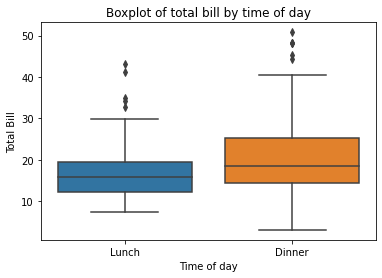

In [56]:
ax = sns.boxplot(data=tips,x='time', y='total_bill')
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

Dinners seem to be more profitable

### Violin Plot

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

This can be an effective and attractive way to show multiple distributions of data at once, but keep in mind that the estimation procedure is influenced by the sample size, and violins for relatively small samples might look misleadingly smooth.

Read more: https://seaborn.pydata.org/generated/seaborn.violinplot.html

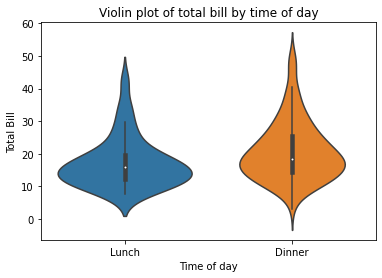

In [57]:
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day');
ax.set_xlabel('Time of day');
ax.set_ylabel('Total Bill');

## Pair Plot

Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

Read more: https://seaborn.pydata.org/generated/seaborn.pairplot.html

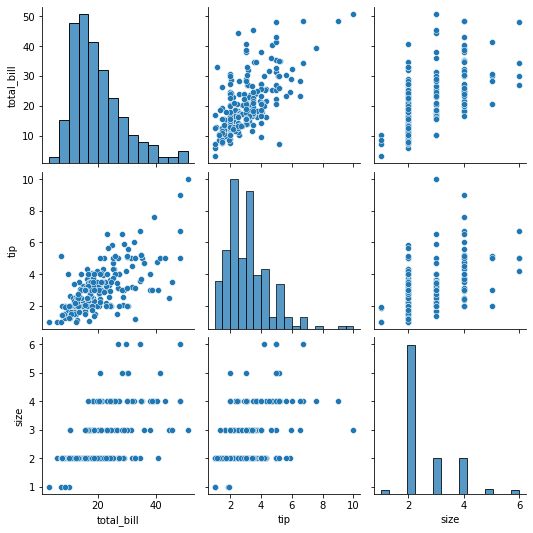

In [60]:
sns.pairplot(tips);

## Multivariate plotting

There are various ways we can do multivariate plotting e.g., by using different aspects of uni/bi-variat plots or using multi faceted presentations

### Violin Plots

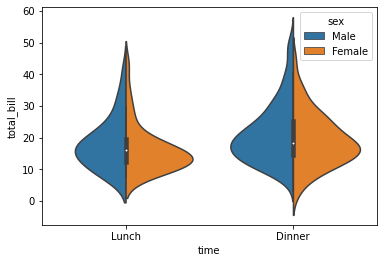

In [62]:
ax = sns.violinplot(data=tips,x='time', y='total_bill',hue='sex',split=True)

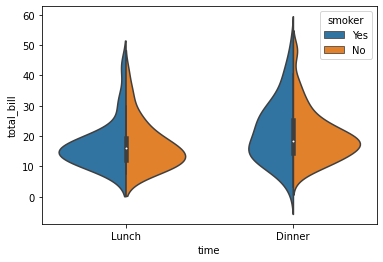

In [63]:
ax = sns.violinplot( data=tips,x='time', y='total_bill',hue='smoker',split=True)

### Pair Plots

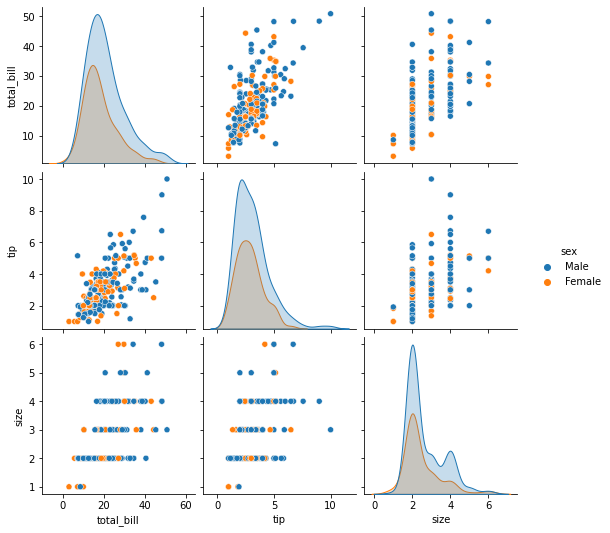

In [64]:
fig = sns.pairplot(tips, hue='sex')

### Facet Plots

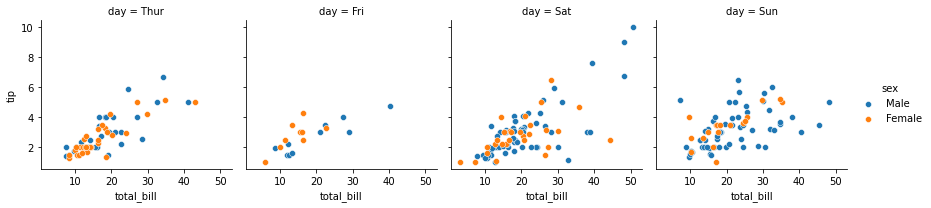

In [65]:
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(sns.scatterplot, 'total_bill', 'tip')
facet = facet.add_legend()


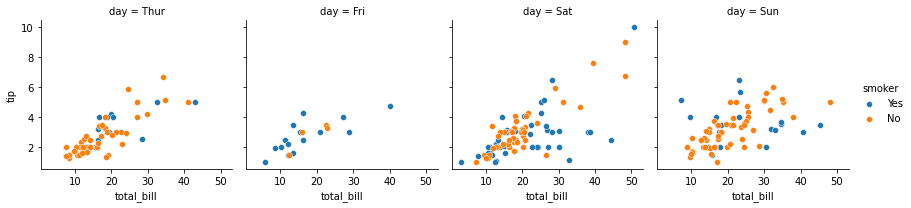

In [41]:
facet = sns.FacetGrid(tips, col='day', hue='smoker')
facet = facet.map(sns.scatterplot, 'total_bill', 'tip')
facet = facet.add_legend()

More resources


https://www.youtube.com/watch?v=6GUZXDef2U0